<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-11-15 03:02:28--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-11-15 03:02:29--  https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-11-15 03:02:29--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.git

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/job_postings.zip
!unzip job_postings.zip

## 17-1

In [6]:
import glob

html_contents = []

for file_name in sorted(glob.glob('job_postings/*.html')):
    with open(file_name, 'r') as f:
        html_contents.append(f.read())

print(f"{len(html_contents)}개의 HTML 파일을 불러왔습니다")

1458개의 HTML 파일을 불러왔습니다


## 17-2

In [7]:
from bs4 import BeautifulSoup as bs
soup_objects = []

for html in html_contents:
    soup = bs(html)
    assert soup.title is not None
    assert soup.body is not None
    soup_objects.append(soup)

## 17-3

In [8]:
import pandas as pd

html_dict = {'Title': [], 'Body': []}

for soup in soup_objects:
    title = soup.find('title').text
    body = soup.find('body').text
    html_dict['Title'].append(title)
    html_dict['Body'].append(body)

df_jobs = pd.DataFrame(html_dict)
summary = df_jobs.describe()
print(summary)

                                Title  \
count                            1458   
unique                           1364   
top     Data Scientist - New York, NY   
freq                               13   

                                                     Body  
count                                                1458  
unique                                               1458  
top     Data Scientist - Beavercreek, OH\nData Scienti...  
freq                                                    1  


## 17-4

In [9]:
from IPython.core.display import display, HTML
assert len(set(html_contents)) == len(html_contents)
display(HTML(html_contents[0]))

## 17-5

In [10]:
display(HTML(html_contents[1]))

## 17-6

In [11]:
df_jobs['Bullets'] = [[bullet.text.strip()
                        for bullet in soup.find_all('li')]
                        for soup in soup_objects]

## 17-7

In [12]:
bulleted_post_count = 0

for bullet_list in df_jobs.Bullets:
    if bullet_list:
        bulleted_post_count += 1

percent_bulleted = 100 * bulleted_post_count / df_jobs.shape[0]
print(f"{percent_bulleted:.2f}%의 게시글이 글머리 기호를 포함합니다")

90.53%의 게시글이 글머리 기호를 포함합니다


## 17-8

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def rank_words(text_list):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_list).toarray()
    df = pd.DataFrame({'Words': vectorizer.get_feature_names_out(),
                        'Summed TFIDF': tfidf_matrix.sum(axis=0)})
    sorted_df = df.sort_values('Summed TFIDF', ascending=False)
    return sorted_df

all_bullets = []
for bullet_list in df_jobs.Bullets:
    all_bullets.extend(bullet_list)

sorted_df = rank_words(all_bullets)
print(sorted_df[:5].to_string(index=False))

     Words  Summed TFIDF
experience    878.030398
      data    842.978780
    skills    440.780236
      work    371.684232
   ability    370.969638


## 17-9

In [15]:
non_bullets = []
for soup in soup_objects:
    body = soup.body
    for tag in body.find_all('li'):
        tag.decompose()
    non_bullets.append(body.text)

sorted_df = rank_words(non_bullets)
print(sorted_df[:5].to_string(index=False))

     Words  Summed TFIDF
      data     99.111312
      team     39.175041
      work     38.928948
experience     36.820836
  business     36.140488


## 17-10

In [16]:
regex = r'Data Scien(ce|tist)'
df_non_ds_jobs = df_jobs[~df_jobs.Title.str.contains(regex, case=False)]

percent_non_ds = 100 * df_non_ds_jobs.shape[0] / df_jobs.shape[0]
print(f"채용 공고 제목의 {percent_non_ds:.2f}%가 데이터 과학 직책을 언급하지 않습니다."
        "다음은 그중 일부 샘플을 보여 줍니다\n")

for title in df_non_ds_jobs.Title[:10]:
    print(title)

채용 공고 제목의 64.33%가 데이터 과학 직책을 언급하지 않습니다.다음은 그중 일부 샘플을 보여 줍니다

Patient Care Assistant / PCA - Med/Surg (Fayette, AL) - Fayette, AL
Data Manager / Analyst - Oakland, CA
Scientific Programmer - Berkeley, CA
JD Digits - AI Lab Research Intern - Mountain View, CA
Operations and Technology Summer 2020 Internship-West Coast - Universal City, CA
Data and Reporting Analyst - Olympia, WA 98501
Senior Manager Advanced Analytics - Walmart Media Group - San Bruno, CA
Data Specialist, Product Support Operations - Sunnyvale, CA
Deep Learning Engineer - Westlake, TX
Research Intern, 2020 - San Francisco, CA 94105


## 17-11

In [17]:
bullets = df_non_ds_jobs.Bullets.iloc[0]
for i, bullet in enumerate(bullets[:5]):
    print(f"{i}: {bullet.strip()}")

0: Provides all personal care services in accordance with the plan of treatment assigned by the registered nurse
1: Accurately documents care provided
2: Applies safety principles and proper body mechanics to the performance of specific techniques of personal and supportive care, such as ambulation of patients, transferring patients, assisting with normal range of motions and positioning
3: Participates in economical utilization of supplies and ensures that equipment and nursing units are maintained in a clean, safe manner
4: Routinely follows and adheres to all policies and procedures


## 17-12

In [22]:
!wget https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/resume.txt
!wget https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/table_of_contents.txt

--2024-11-15 03:14:49--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/resume.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘resume.txt.1’

resume.txt.1        100%[===================>]     683  --.-KB/s    in 0s      

2024-11-15 03:14:49 (26.1 MB/s) - ‘resume.txt.1’ saved [683/683]

--2024-11-15 03:14:49--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/table_of_contents.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4002 (

In [20]:
resume = open('resume.txt', 'r').read()
print(resume)

Experience

1. Developed probability simulations using NumPy.
2. Assessed online ad-clicks for statistical significance using Permutation testing.
3. Analyzed disease outbreaks using common clustering algorithms.

Additional Skills

1. Data visualization using Matplotlib.
2. Statistical analysis using SciPy.
3. Processing structured tables using Pandas.
4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.
5. Extracting locations from text using GeonamesCache.
6. Location analysis and visualization using GeonamesCache and Basemap.
7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.
8. NLP analysis and text topic detection using Scikit-Learn.


## 17-13

In [23]:
table_of_contents = open('table_of_contents.txt', 'r').read()

## 17-14

In [24]:
existing_skills = resume + table_of_contents

## 17-15

In [25]:
text_list = df_jobs.Body.values.tolist() + [existing_skills]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_list).toarray()

## 17-16

In [26]:
cosine_similarities = tfidf_matrix[:-1] @ tfidf_matrix[-1]

## 17-17

In [27]:
df_jobs['Relevance'] = cosine_similarities
sorted_df_jobs = df_jobs.sort_values('Relevance', ascending=False)
for title in sorted_df_jobs[-20:].Title:
    print(title)

Data Analyst Internship (8 month minimum) - San Francisco, CA
Leadership and Advocacy Coordinator - Oakland, CA 94607
Finance Consultant - Audi Palo Alto - Palo Alto, CA
RN - Hattiesburg, MS
Configuration Management Specialist - Dahlgren, VA
Deal Desk Analyst - Mountain View, CA
Dev Ops Engineer AWS - Rockville, MD
Web Development Teaching Assistant - UC Berkeley (Berkeley) - Berkeley, CA
Scorekeeper - Oakland, CA 94612
Direct Care - All Experience Levels (CNA, HHA, PCA Welcome) - Norwell, MA 02061
Director of Marketing - Cambridge, MA
Certified Strength and Conditioning Specialist - United States
PCA - PCU Full Time - Festus, MO 63028
Performance Improvement Consultant - Los Angeles, CA
Patient Services Rep II - Oakland, CA
Lab Researcher I - Richmond, CA
Part-time instructor of Statistics for Data Science and Machine Learning - San Francisco, CA 94105
Plant Engineering Specialist - San Pablo, CA
Page Not Found - Indeed Mobile
Director of Econometric Modeling - External Careers


## 17-18

In [28]:
for title in sorted_df_jobs[:20].Title:
    print(title)

Chief Data Officer - Culver City, CA 90230
Data Scientist - Beavercreek, OH
Data Scientist Population Health - Los Angeles, CA 90059
Data Scientist - San Diego, CA
Data Scientist - Beavercreek, OH
Senior Data Scientist - New York, NY 10018
Data Architect - Raleigh, NC 27609
Data Scientist (PhD) - Spring, TX
Data Science Analyst - Chicago, IL 60612
Associate Data Scientist (BS / MS) - Spring, TX
Data Scientist - Streetsboro, OH 44241
Data Scientist - Los Angeles, CA
Sr Director of Data Science - Elkridge, MD
2019-57 Sr. Data Scientist - Reston, VA 20191
Data Scientist (PhD) - Intern - Spring, TX
Sr Data Scientist. - Alpharetta, GA 30004
Data Scientist GS 13/14 - Clarksburg, WV 26301
Data Science Intern (BS / MS) - Intern - Spring, TX
Senior Data Scientist - New York, NY 10038
Data Scientist - United States


## 17-19

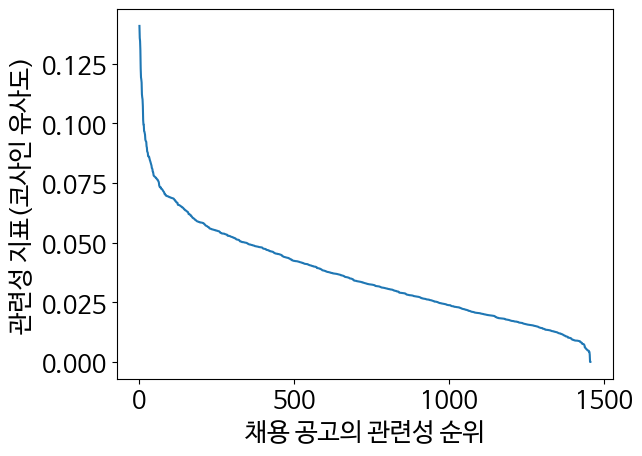

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(df_jobs.shape[0]), sorted_df_jobs.Relevance.values)
plt.xlabel('채용 공고의 관련성 순위')
plt.ylabel('관련성 지표(코사인 유사도)')
plt.show()

## 17-20

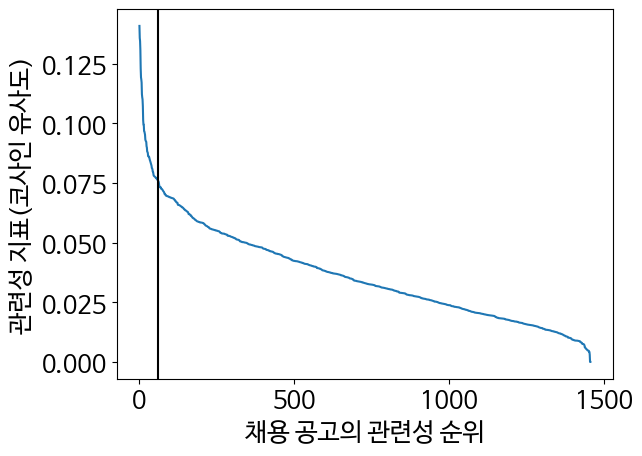

In [30]:
plt.plot(range(df_jobs.shape[0]), sorted_df_jobs.Relevance.values)
plt.xlabel('채용 공고의 관련성 순위')
plt.ylabel('관련성 지표(코사인 유사도)')
plt.axvline(60, c='k')
plt.show()

## 17-21

In [31]:
for title in sorted_df_jobs[40: 60].Title.values:
    print(title)

Data Scientist III - Pasadena, CA 91101
Global Data Engineer - Boston, MA
Data Analyst and Data Scientist - Summit, NJ
Data Scientist - Generalist - Glendale, CA
Data Scientist - Seattle, WA
IT Data Scientist - Contract - Riverton, UT
Data Scientist (Analytic Consultant 4) - San Francisco, CA
Data Scientist - Seattle, WA
Data Science & Tagging Analyst - Bethesda, MD 20814
Data Scientist - New York, NY
Senior Data Scientist - Los Angeles, CA
Principal Statistician - Los Angeles, CA
Senior Data Analyst - Los Angeles, CA
Data Scientist - Aliso Viejo, CA 92656
Data Engineer - Seattle, WA
Data Scientist - Digital Factory - Tampa, FL 33607
Data Scientist - Grapevine, TX 76051
Data Scientist - Bioinformatics - Denver, CO 80221
EPIDEMIOLOGIST - Los Angeles, CA
Data Scientist - Bellevue, WA


## 17-22

In [32]:
for title in sorted_df_jobs[60: 80].Title.values:
    print(title)

Data Scientist - Aliso Viejo, CA
Data Scientist and Visualization Specialist - Santa Clara Valley, CA 95014
Data Scientist - Los Angeles, CA
Data Scientist Manager - NEW YORK LOCATION! - New York, NY 10036
Data Science Intern - San Francisco, CA 94105
Research Data Analyst - San Francisco, CA
Sr Data Scientist (Analytic Consultant 5) - San Francisco, CA
Data Scientist, Media Manipulation - Cambridge, MA
Manager, Data Science, Programming and Visualization - Boston, MA
Data Scientist in Broomfield, CO - Broomfield, CO
Senior Data Scientist - Executive Projects and New Solutions - Foster City, CA
Manager of Data Science - Burbank California - Burbank, CA
Data Scientist Manager - Hiring in Burbank! - Burbank, CA
Data Scientists needed in NY - Senior Consultants and Managers! - New York, NY 10036
Data Scientist - Menlo Park, CA
Data Engineer - Santa Clara, CA
Data Scientist - Remote
Data Scientist I-III - Phoenix, AZ 85021
SWE Data Scientist - Santa Clara Valley, CA 95014
Health Science Sp

## 17-23

In [33]:
import re

def percent_relevant_titles(df):
    regex_relevant = re.compile(r'Data (Scien|Analy)', flags=re.IGNORECASE)
    regex_irrelevant = re.compile(r'\b(Manage)', flags=re.IGNORECASE)
    match_count = len([title for title in df.Title
                        if regex_relevant.search(title)
                        and not regex_irrelevant.search(title)])
    percent = 100 * match_count / df.shape[0]
    return percent

percent = percent_relevant_titles(sorted_df_jobs[60: 80])
print(f"60~80 순위 채용 공고 중 약 {percent:.2f}%의 제목이 관련성을 보입니다")

60~80 순위 채용 공고 중 약 65.00%의 제목이 관련성을 보입니다


## 17-24

In [34]:
percent = percent_relevant_titles(sorted_df_jobs[80: 100])
print(f"80~100순위 채용 공고 중 약 {percent:.2f}%의 제목이 관련성을 보입니다")

80~100순위 채용 공고 중 약 80.00%의 제목이 관련성을 보입니다


## 17-25

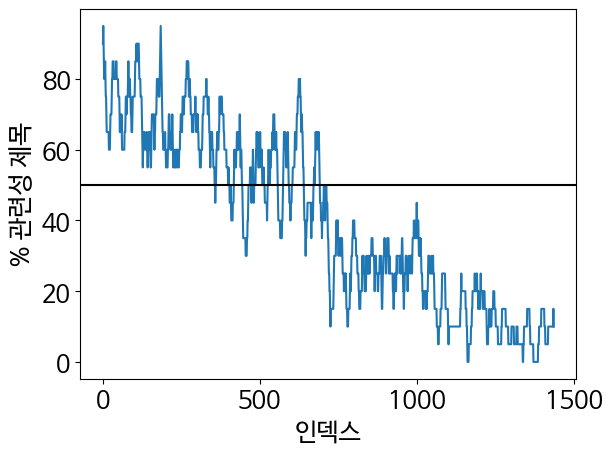

In [39]:
def relevant_title_plot(index_range=20):
    percentages = []
    start_indices = range(df_jobs.shape[0] - index_range)
    for i in start_indices:
        df_slice = sorted_df_jobs[i: i + index_range]
        percent = percent_relevant_titles(df_slice)
        percentages.append(percent)

    plt.plot(start_indices, percentages)
    plt.axhline(50, c='k')
    plt.xlabel('인덱스')
    plt.ylabel('% 관련성 제목')

relevant_title_plot()
plt.show()

## 17-26

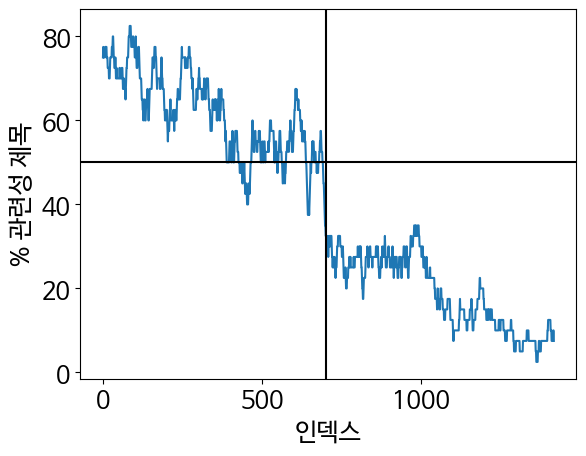

In [38]:
relevant_title_plot(index_range=40)
plt.axvline(700, c='k')
plt.show()

## 17-27

In [40]:
total_bullets = []
for bullets in sorted_df_jobs[:60].Bullets:
    total_bullets.extend(bullets)

## 17-28

In [41]:
df_bullets = pd.DataFrame({'Bullet': total_bullets})
print(df_bullets.describe())

                                                   Bullet
count                                                1091
unique                                                900
top     Knowledge of advanced statistical techniques a...
freq                                                    9


## 17-29

In [43]:
total_bullets = sorted(set(total_bullets))
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(total_bullets)
num_rows, num_columns = tfidf_matrix.shape
print(f"행렬은 {num_rows}개의 행과 {num_columns}개의 열을 가집니다")

행렬은 900개의 행과 2070개의 열을 가집니다


## 17-30

In [44]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
np.random.seed(0)

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=100)
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix)
    return normalize(shrunk_matrix)

shrunk_norm_matrix = shrink_matrix(tfidf_matrix)

## 17-31

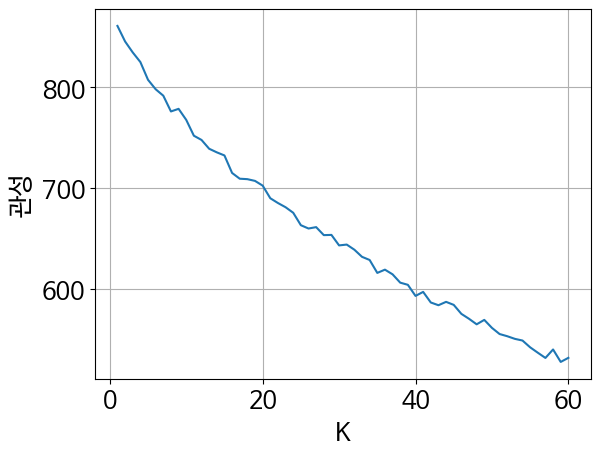

In [45]:
np.random.seed(0)
from sklearn.cluster import MiniBatchKMeans

def generate_elbow_plot(matrix):
    k_values = range(1, 61)
    inertia_values = [MiniBatchKMeans(k).fit(matrix).inertia_ for k in k_values]
    plt.plot(k_values, inertia_values)
    plt.xlabel('K')
    plt.ylabel('관성')
    plt.grid(True)
    plt.show()

generate_elbow_plot(shrunk_norm_matrix)

## 17-32

In [46]:
np.random.seed(0)
from sklearn.cluster import KMeans

def compute_cluster_groups(shrunk_norm_matrix, k=15, bullets=total_bullets):
    cluster_model = KMeans(n_clusters=k)
    clusters = cluster_model.fit_predict(shrunk_norm_matrix)
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters, 'Bullet': bullets})
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

cluster_groups = compute_cluster_groups(shrunk_norm_matrix)

## 17-33

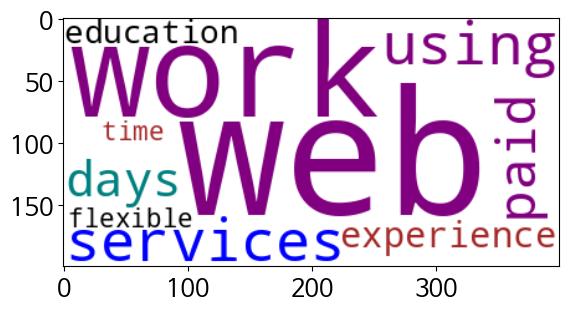

In [48]:
from wordcloud import WordCloud
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer):
    indices = df_cluster.Index.values
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
    data = {'Word': vectorizer.get_feature_names_out(),'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score
                        for word, score in df_ranked_words[:max_words].values
                        if score != 0}
    cloud_generator = WordCloud(background_color='white',
                                color_func=_color_func,
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

wordcloud_image = cluster_to_image(cluster_groups[0])
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.show()

## 17-34

In [51]:
np.random.seed(1)
def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]
    for bullet in np.random.choice(df_cluster.Bullet.values, 5, replace=False):
        print(bullet)

print_cluster_sample(0)

Additional 10 paid holidays annually
Actively participates and contributes in brain-storming session. Can work seamlessly with people from other disciplines: IT engineers, client SMEs, business consultants
Paid time off
Work with data engineers to plan, implement, and automate integration of external data sources across a variety of architectures, including local databases, web APIs, CRM systems, etc
Implemented responsive web pages using HTML5/CSS3 and BOOTSTRAP


## 17-35

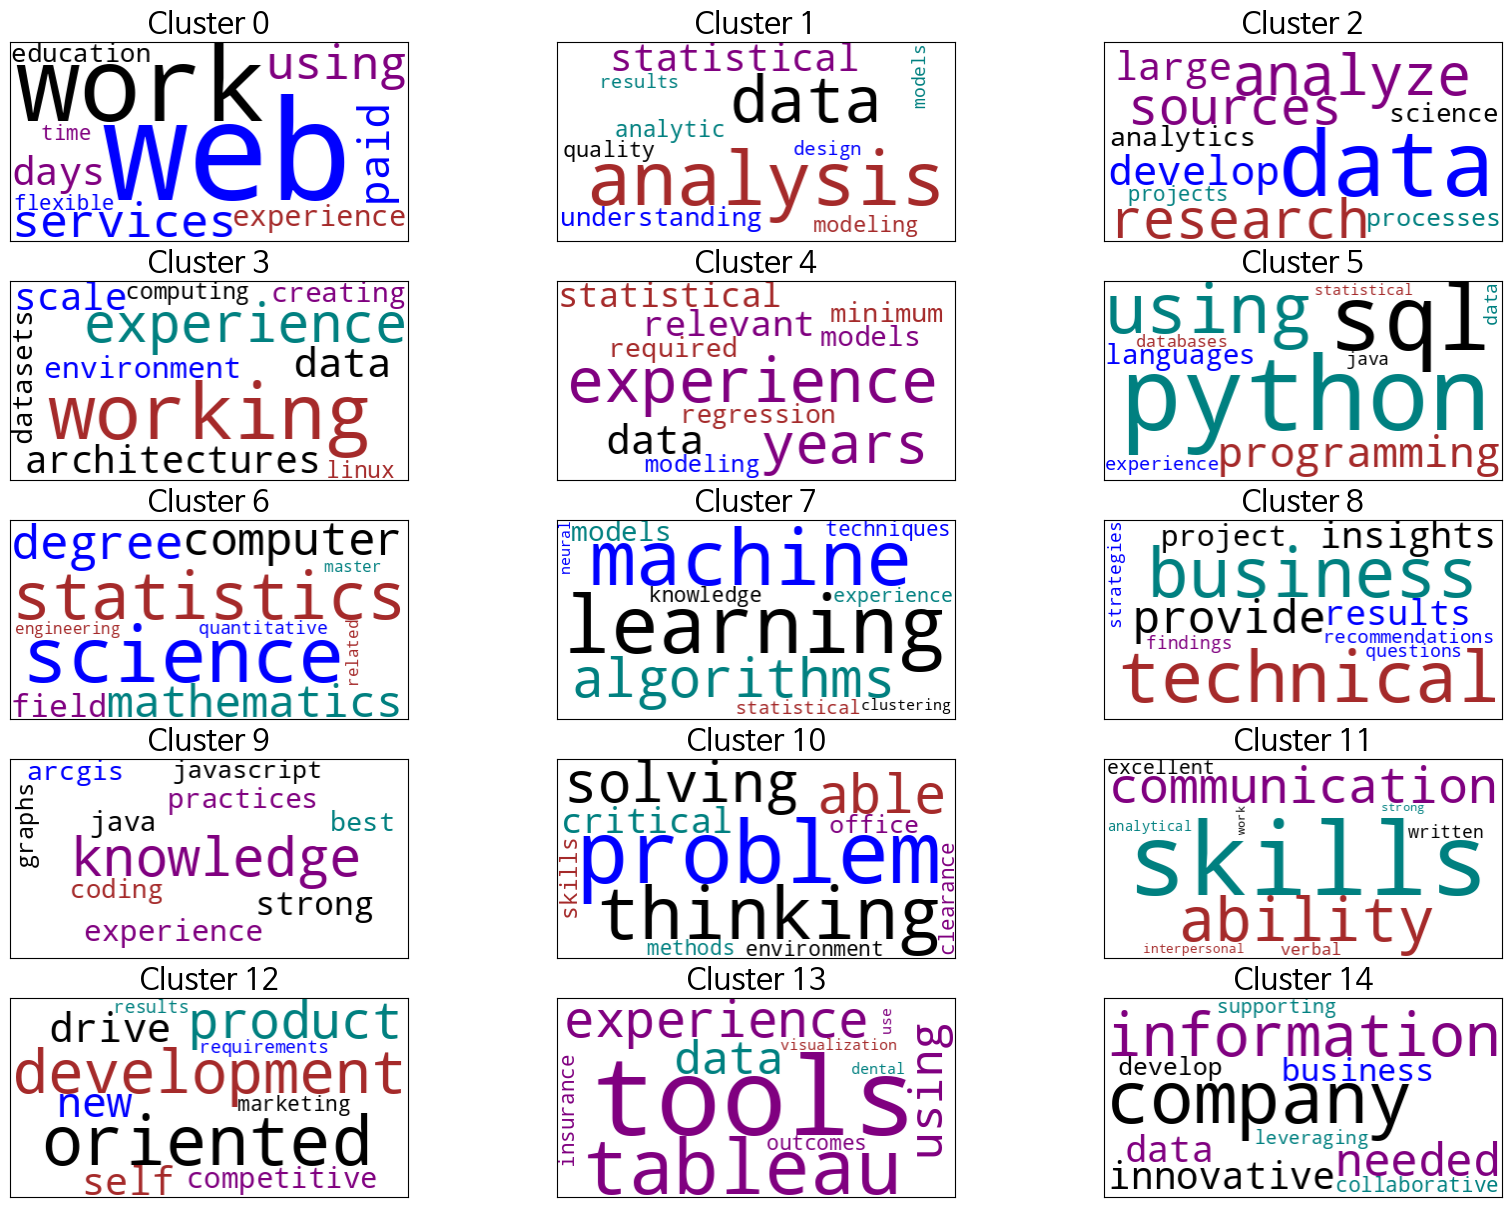

In [52]:
def plot_wordcloud_grid(cluster_groups, num_rows=5, num_columns=3, **kwargs):
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    cluster_groups_copy = cluster_groups[:]
    for r in range(num_rows):
        for c in range(num_columns):
            if not cluster_groups_copy:
                break

            df_cluster = cluster_groups_copy.pop(0)
            wordcloud_image = cluster_to_image(df_cluster, **kwargs)
            ax = axes[r][c]
            ax.imshow(wordcloud_image, interpolation="bilinear")
            ax.set_title(f"Cluster {df_cluster.Cluster.iloc[0]}")
            ax.set_xticks([])
            ax.set_yticks([])

plot_wordcloud_grid(cluster_groups)
plt.show()

## 17-36

In [53]:
np.random.seed(1)
print_cluster_sample(7)

Machine Learning experience using Tensorflow, Scikit-learn, or Spark ML
Understanding of machine learning algorithms, such as k-NN, GBM, Neural Networks Naive Bayes, SVM, and Decision Forests
Minimum 2 years experience working in a data science or machine learning environment.
3 + years of experience using quantitative machine learning techniques
Expert knowledge of machine learning libraries such as scikit-learn, TensorFlow, and keras


## 17-37

In [54]:
def compute_bullet_similarity(bullet_texts):
    bullet_vectorizer = TfidfVectorizer(stop_words='english')
    matrix = bullet_vectorizer.fit_transform(bullet_texts + [resume])
    matrix = matrix.toarray()
    return matrix[:-1] @ matrix[-1]

bullet_cosine_similarities = compute_bullet_similarity(total_bullets)

## 17-38

In [55]:
def compute_mean_similarity(df_cluster):
    indices = df_cluster.Index.values
    return bullet_cosine_similarities[indices].mean()

tech_mean = compute_mean_similarity(cluster_groups[7])
soft_mean = compute_mean_similarity(cluster_groups[0])

print(f"기술을 다루는 7번째 그룹의 평균 유사도는 {tech_mean:.3f}입니다")
print(f"비기술을 다루는 3번째 그룹의 평균 유사도는 {soft_mean:.3f}입니다")

기술을 다루는 7번째 그룹의 평균 유사도는 0.073입니다
비기술을 다루는 3번째 그룹의 평균 유사도는 0.045입니다


## 17-39

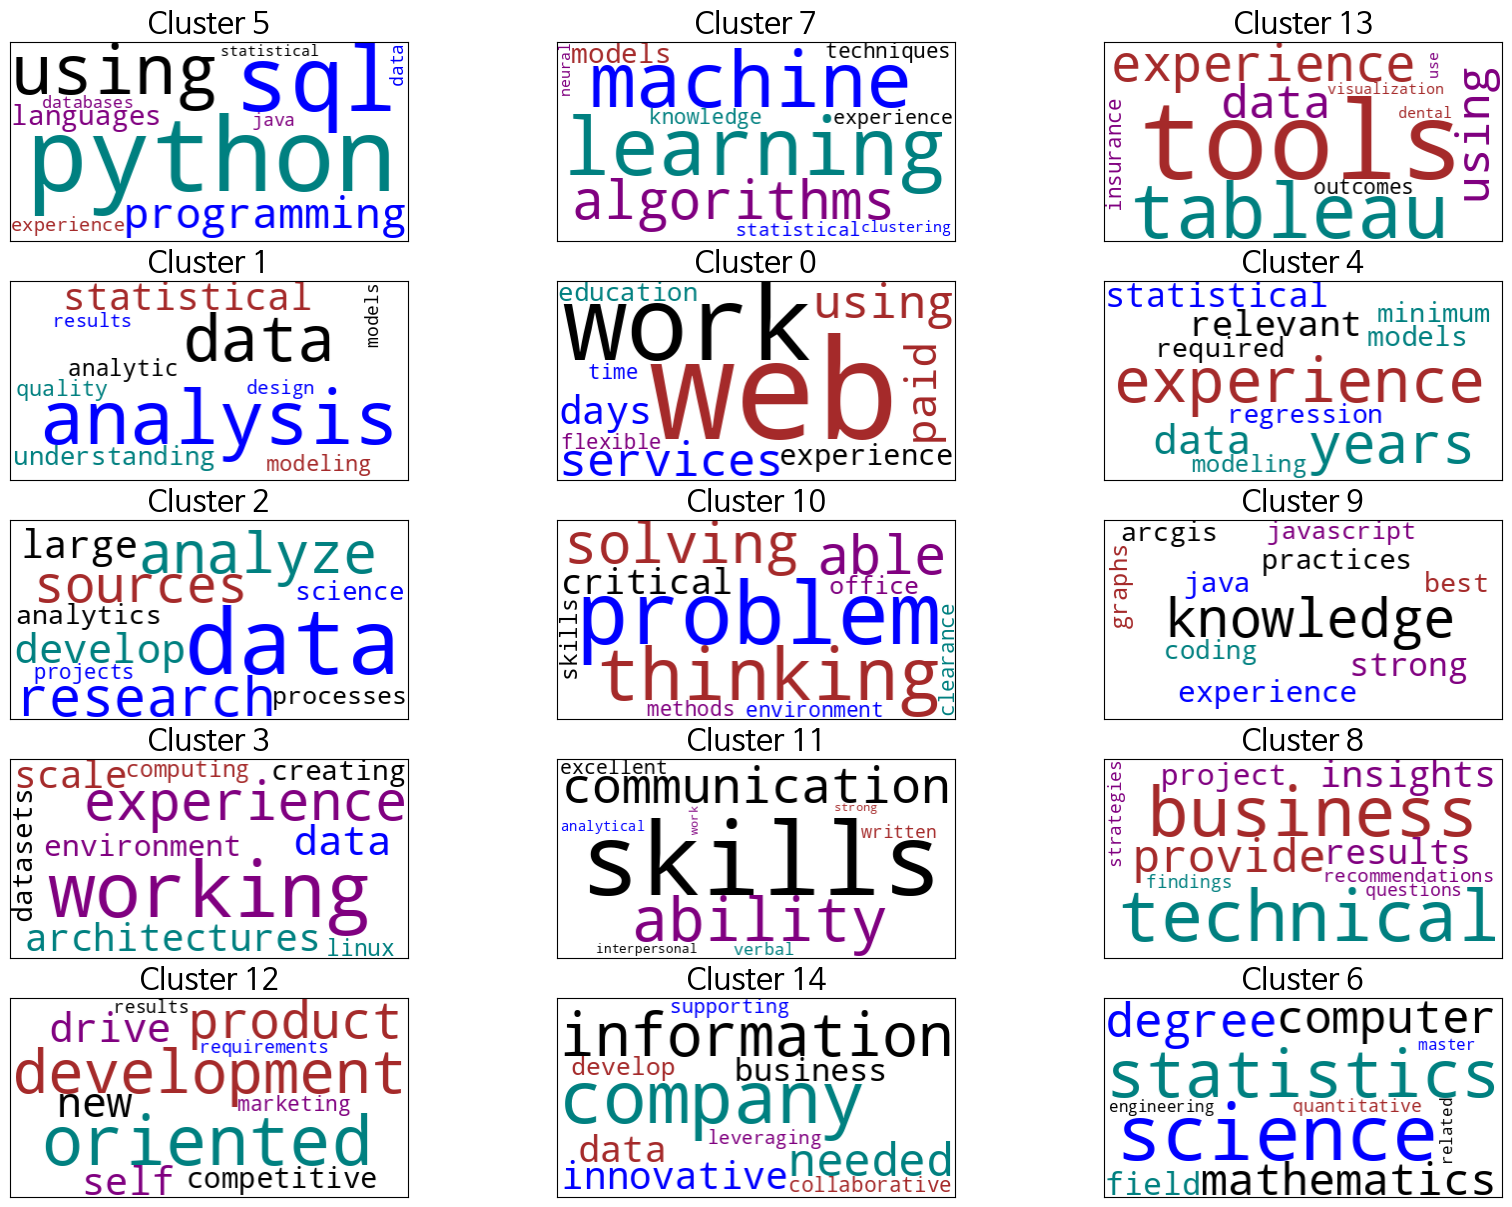

In [56]:
def sort_cluster_groups(cluster_groups):
    mean_similarities = [compute_mean_similarity(df_cluster)
                            for df_cluster in cluster_groups]
    sorted_indices = sorted(range(len(cluster_groups)),
                            key=lambda i: mean_similarities[i], reverse=True)
    return [cluster_groups[i] for i in sorted_indices]

sorted_cluster_groups = sort_cluster_groups(cluster_groups)
plot_wordcloud_grid(sorted_cluster_groups)
plt.show()

## 17-40

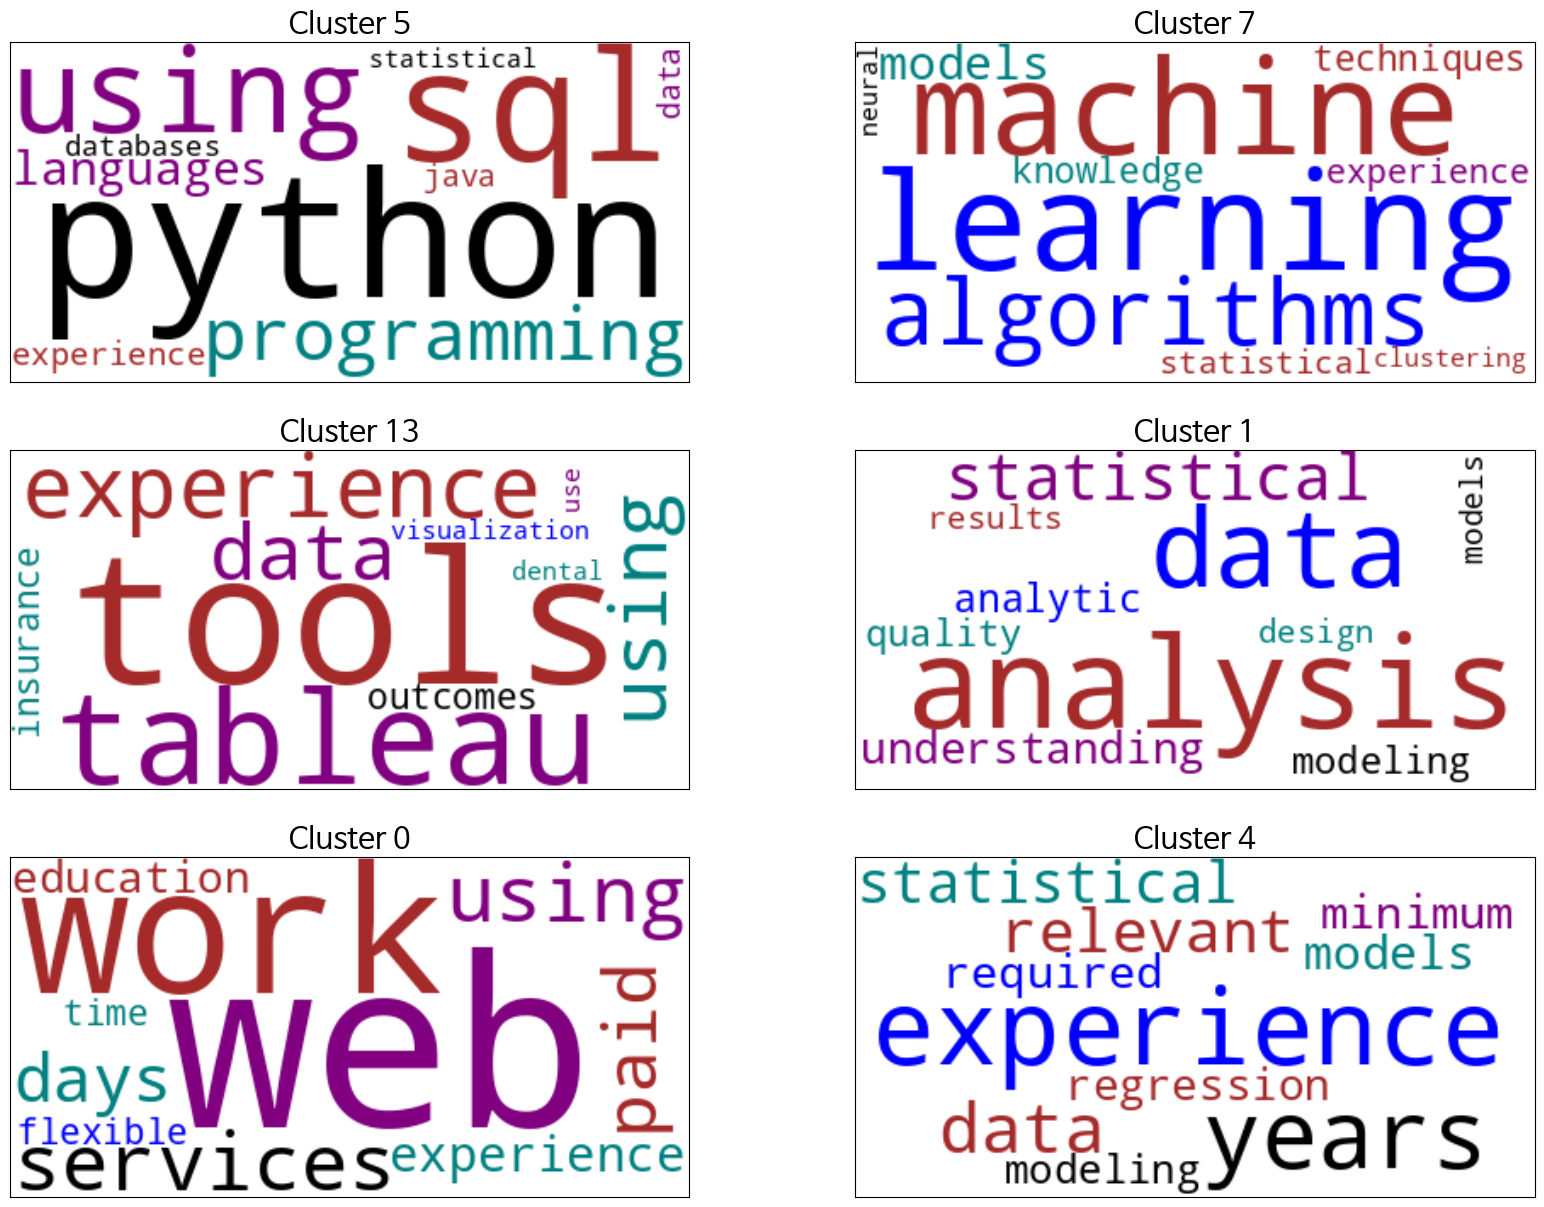

In [58]:
plot_wordcloud_grid(sorted_cluster_groups[:6], num_rows=3, num_columns=2)
plt.show()

## 17-41

In [59]:
np.random.seed(1)
for cluster_id in [8, 1]:
    print(f'\n{cluster_id}번째 그룹')
    print_cluster_sample(cluster_id)


8번째 그룹
Guide the technical approach for the design and implementation of successful models and algorithms in support of expert cross-functional teams delivering on demanding projects
Proven ability to drive business results with data-based insights
Research as necessary to provide information to management and the state legislature;
Provide ongoing and high-level advisory technical services to clients and prospective clients
Analyze results and develop technical reports and presentations

1번째 그룹
Work with product managers and data engineers to discover, collect, cleanse, and refine the data needed for analysis and modeling
Intermediate to Expert level proficiency with statistical probabilistic modeling techniques such as regression, tree-based methods (Random Forest, GBM), neural networks, support vector machines, supervised/unsupervised clustering techniques (k-means, DBSCAN, Expectation Maximization), principal component and factor analysis, etc
Using statistical software or spreads

## 17-42

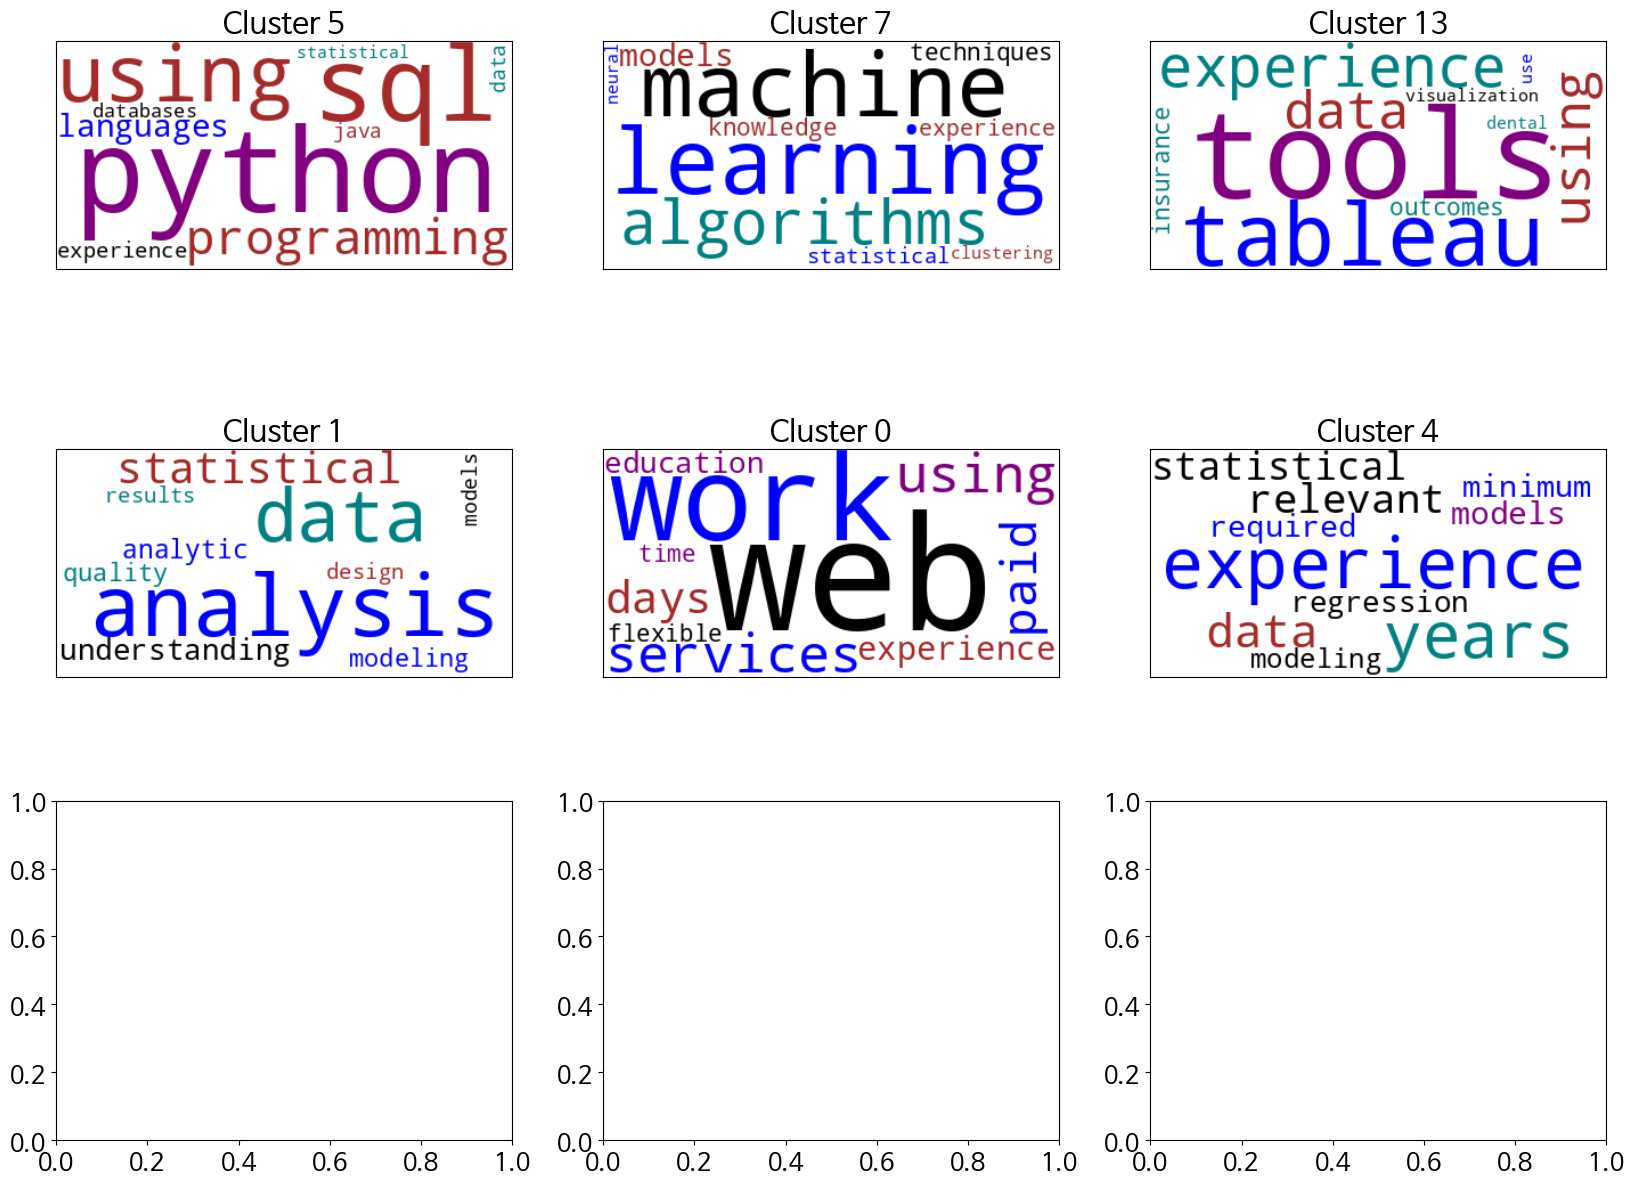

In [60]:
plot_wordcloud_grid(sorted_cluster_groups[:6], num_rows=3, num_columns=3)
plt.show()

## 17-43

In [61]:
np.random.seed(1)
for cluster_id in [6, 3]:
    print(f'\n{cluster_id}번째 그룹')
    print_cluster_sample(cluster_id)


6번째 그룹
MS in a quantitative research discipline (e.g., Artificial Intelligence, Computer Science, Machine Learning, Statistics, Applied Math, Operations Research)
Master’s degree in data science, applied mathematics, or bioinformatics preferred.
PhD degree preferred
Ph.D. in a quantitative discipline (e.g., statistics, computer science, economics, mathematics, physics, electrical engineering, industrial engineering or other STEM fields)
7+ years of experience manipulating data sets and building statistical models, has advanced education in Statistics, Mathematics, Computer Science or another quantitative field, and is familiar with the following software/tools:

3번째 그룹
Expert working within enterprise data warehouse environments platforms (Teradata, Netezza, Oracle, etc.) and working within distributed computing platforms such as Hadoop and associated technologies such as SQL, HQL, MapReduce, Spark, Storm, Yarn, Kafka, Sqoop and Hive
Facilitate data architecture working sessions acros

## 17-44

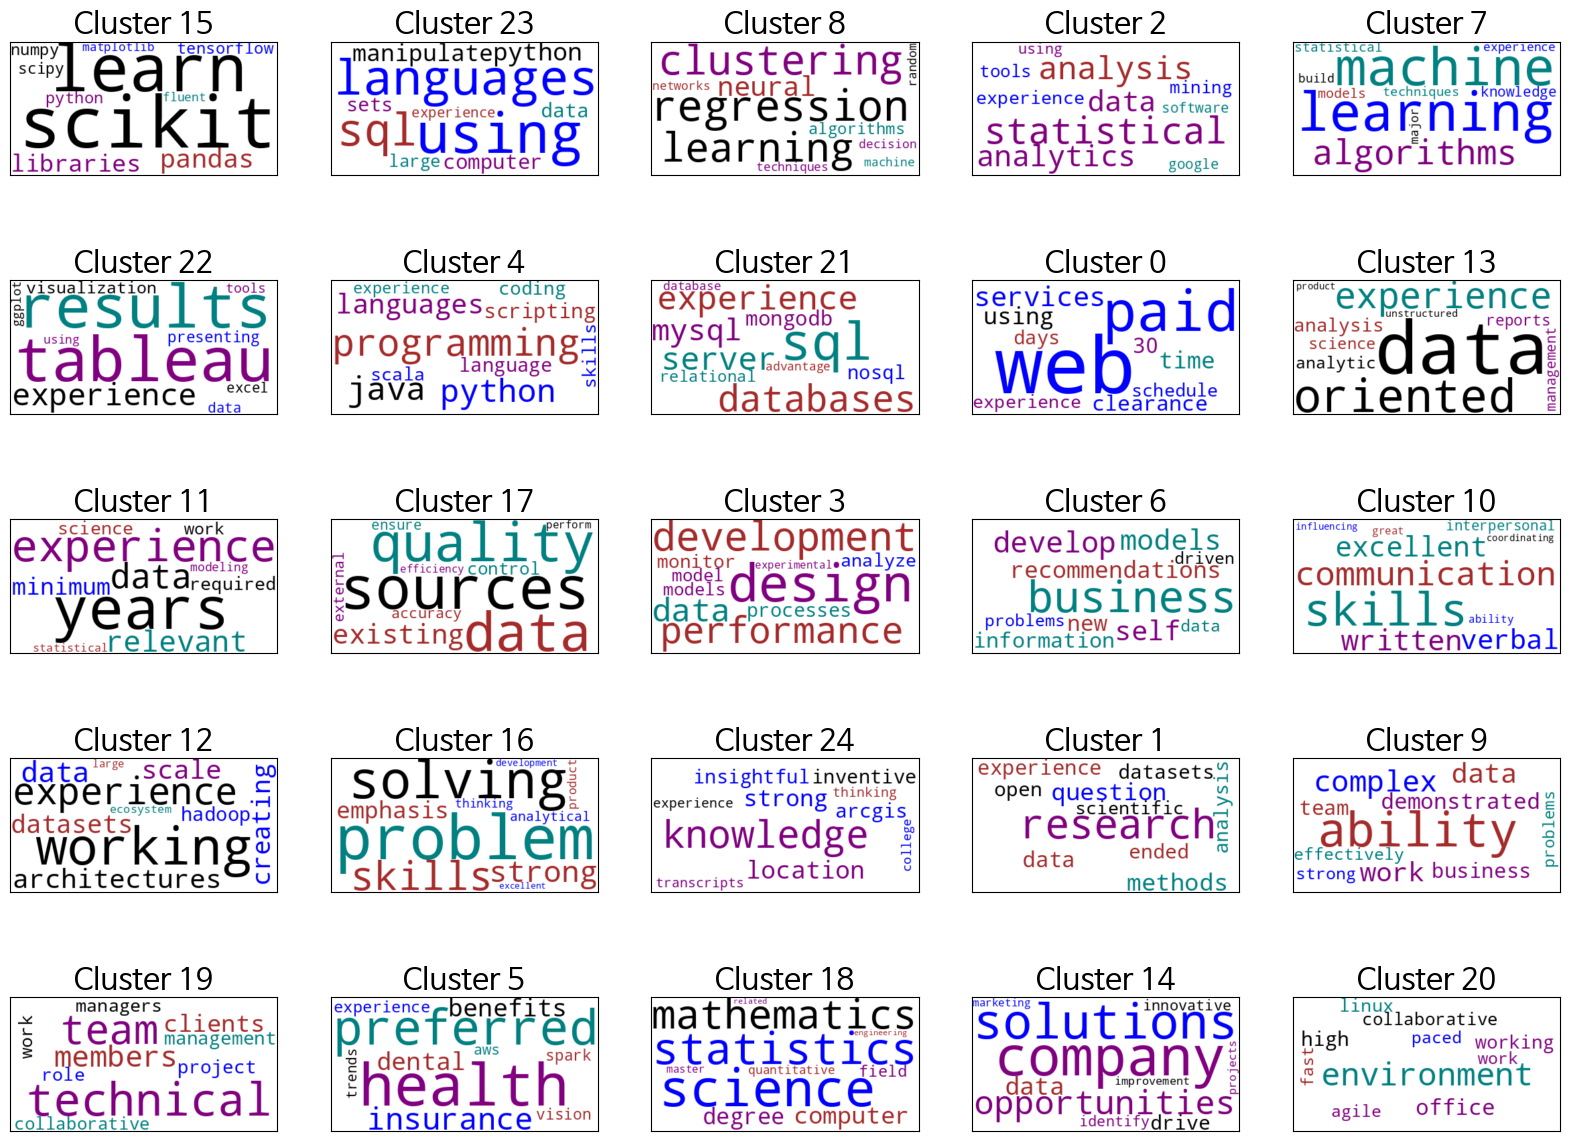

In [62]:
np.random.seed(0)
cluster_groups = compute_cluster_groups(shrunk_norm_matrix, k=25)
sorted_cluster_groups = sort_cluster_groups(cluster_groups)
plot_wordcloud_grid(sorted_cluster_groups, num_rows=5, num_columns=5)
plt.show()

## 17-45

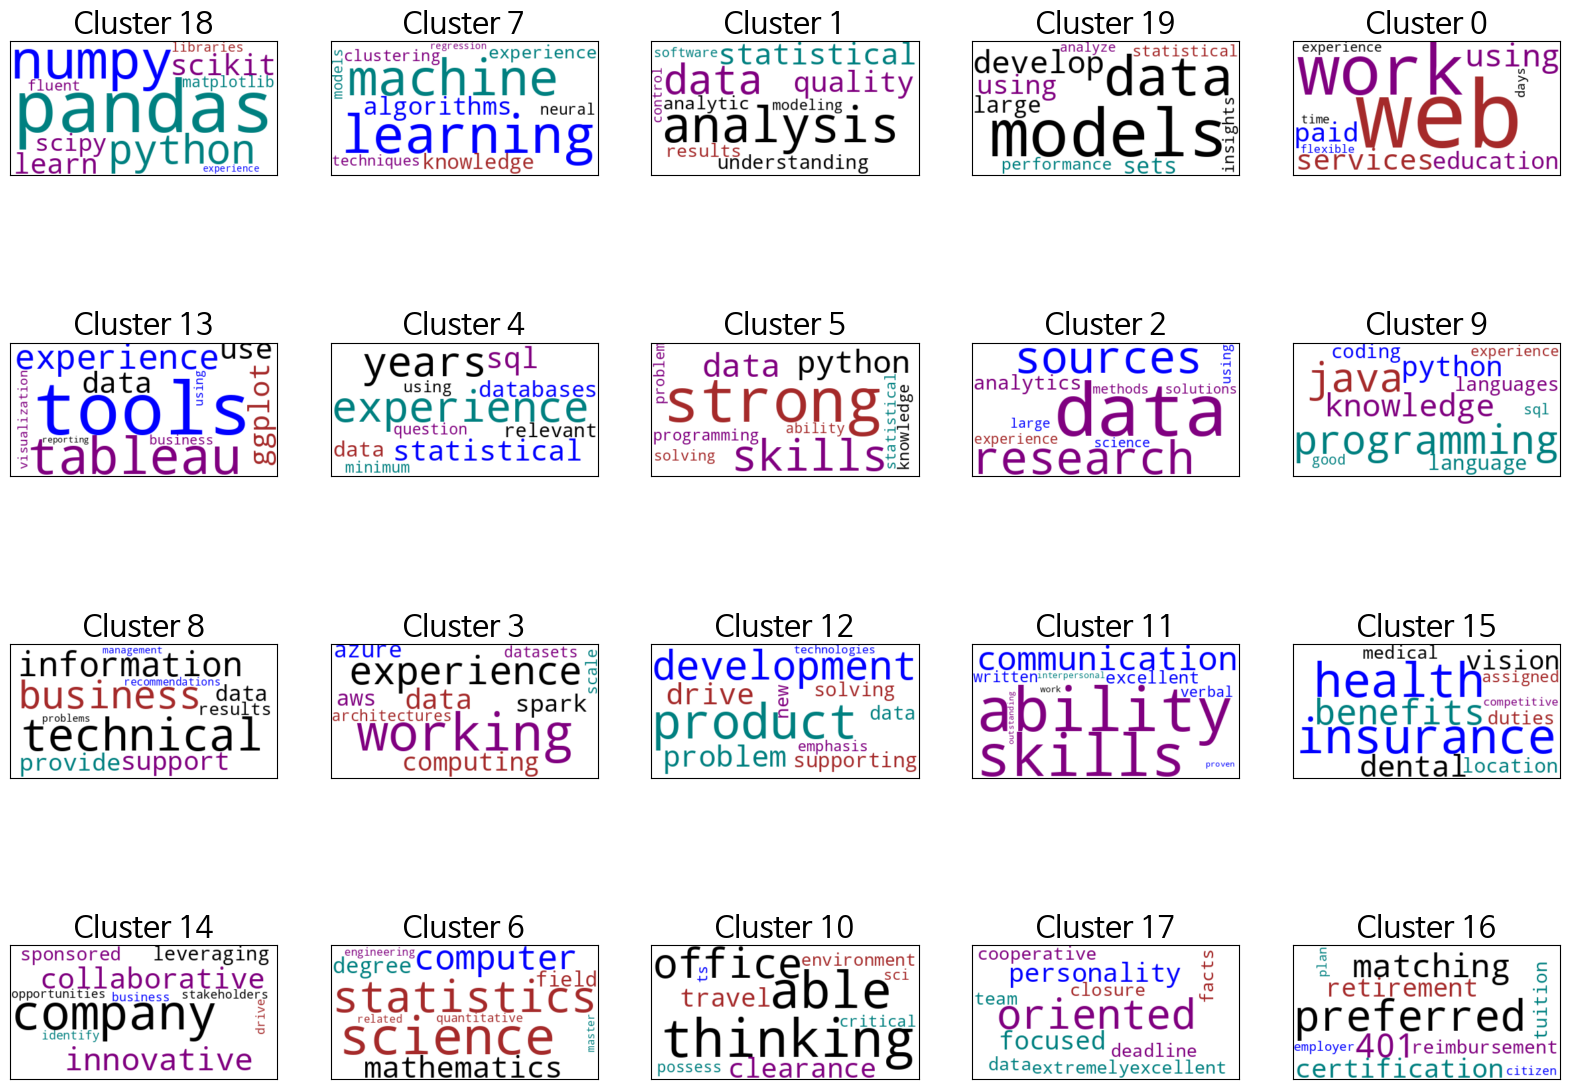

In [63]:
np.random.seed(0)
cluster_groups = compute_cluster_groups(shrunk_norm_matrix, k=20)
sorted_cluster_groups = sort_cluster_groups(cluster_groups)
plot_wordcloud_grid(sorted_cluster_groups, num_rows=4, num_columns=5)
plt.show()

## 17-46

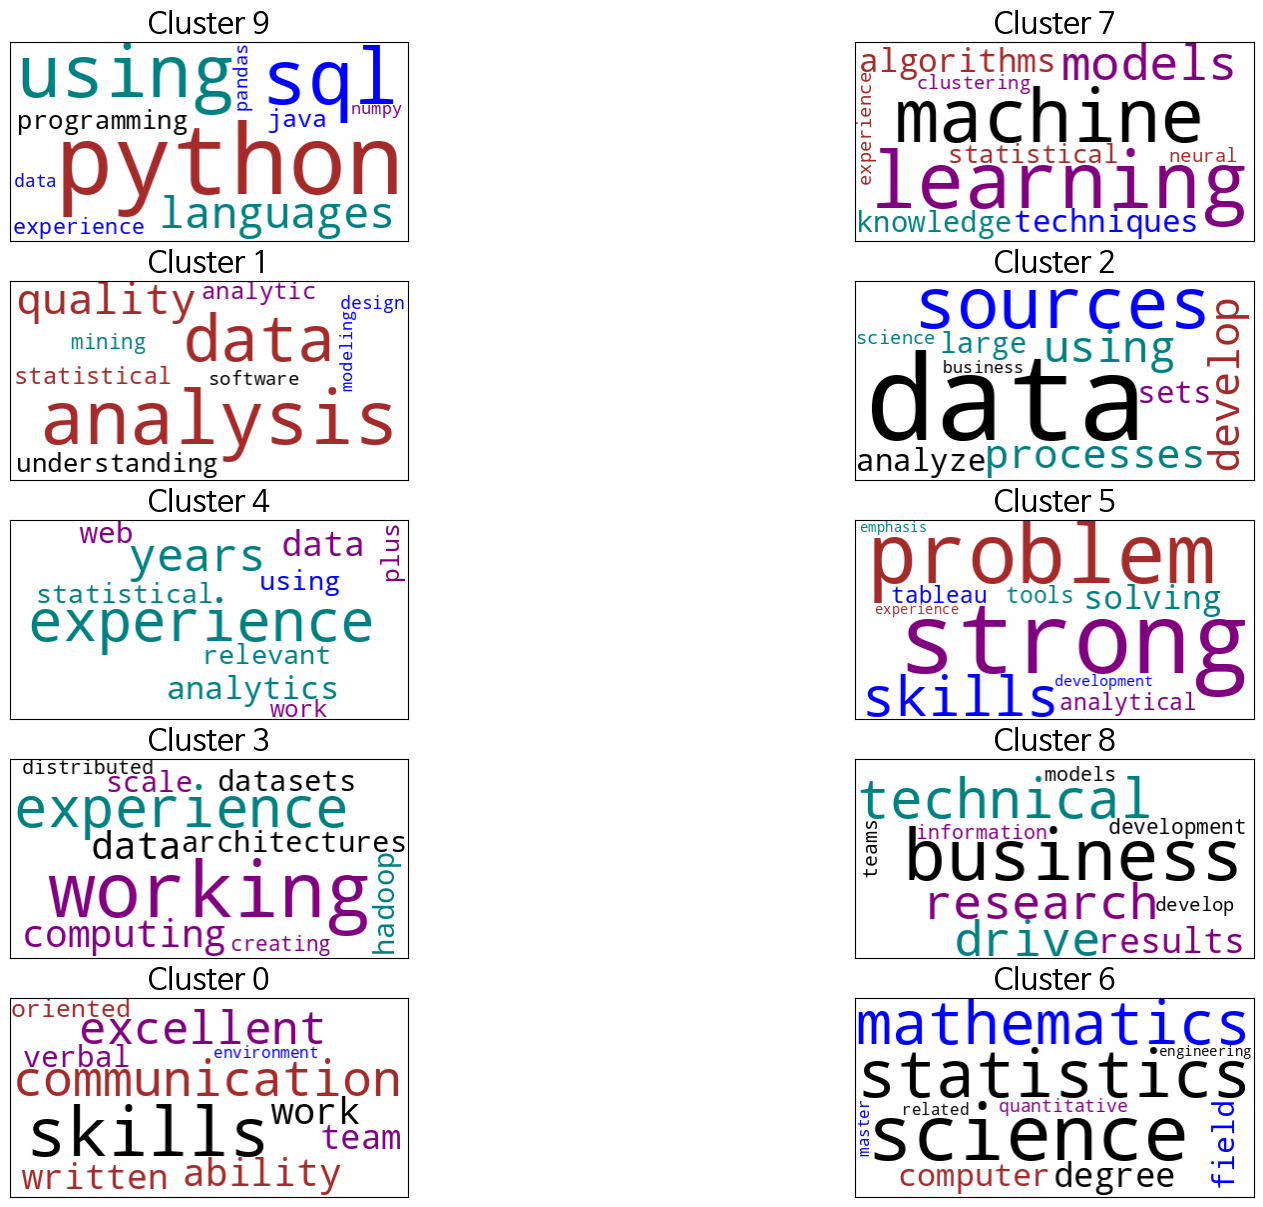

In [64]:
np.random.seed(0)
cluster_groups = compute_cluster_groups(shrunk_norm_matrix, k=10)
sorted_cluster_groups = sort_cluster_groups(cluster_groups)
plot_wordcloud_grid(sorted_cluster_groups, num_rows=5, num_columns=2)
plt.show()

## 17-47

In [65]:
np.random.seed(0)
total_bullets_700 = set()
for bullets in sorted_df_jobs[:700].Bullets:
    total_bullets_700.update([bullet.strip() for bullet in bullets])

total_bullets_700 = sorted(total_bullets_700)
vectorizer_700 = TfidfVectorizer(stop_words='english')
tfidf_matrix_700 = vectorizer_700.fit_transform(total_bullets_700)
shrunk_norm_matrix_700 = shrink_matrix(tfidf_matrix_700)
print(f"{shrunk_norm_matrix_700.shape[0]}개의 글머리 기호들을 벡터화했습니다")

10194개의 글머리 기호들을 벡터화했습니다


## 17-48

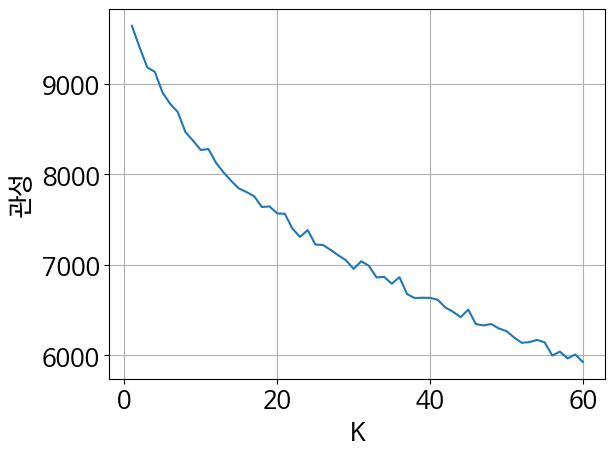

In [67]:
np.random.seed(0)
generate_elbow_plot(shrunk_norm_matrix_700)
plt.show()

## 17-49

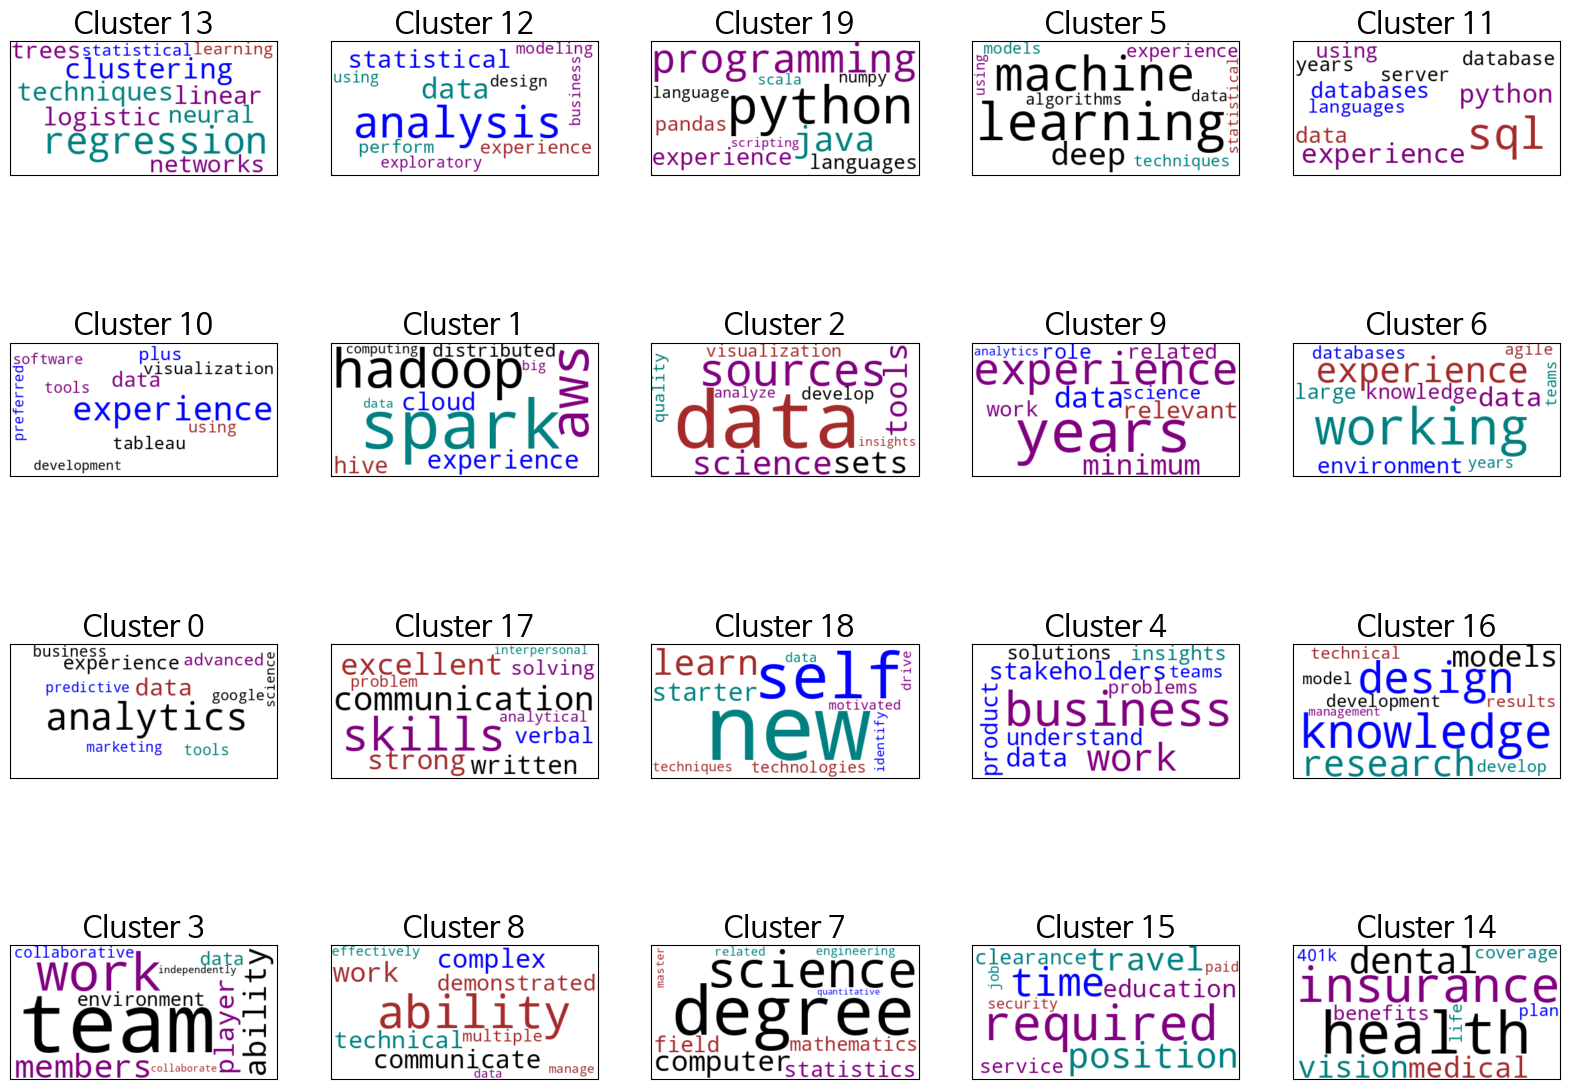

In [68]:
np.random.seed(0)
cluster_groups_700 = compute_cluster_groups(shrunk_norm_matrix_700, k=20, bullets=total_bullets_700)
bullet_cosine_similarities = compute_bullet_similarity(total_bullets_700)
sorted_cluster_groups_700 = sort_cluster_groups(cluster_groups_700)
plot_wordcloud_grid(sorted_cluster_groups_700, num_rows=4, num_columns=5, vectorizer=vectorizer_700, tfidf_matrix=tfidf_matrix_700)